In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/"Colab Notebooks"
!ls

/content/drive/MyDrive/Colab Notebooks
 archive.zip
 BLOCK_DIAGRAM_WORD.docx
'Copy of emotion_detection.ipynb'
'Emotion Dataset for NLP'
 emotion_detection.ipynb
'Emotion From Text - LSTM.ipynb'
 facial_expressions.h5
 FER_63
 fer_model.h5
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
'GloVe + Emotion From Text - LSTM.ipynb'
 gloVe-practice.ipynb
'Image Classification CNN Keras Dataset'
'Image Classification using CNN Keras.ipynb'
 Late_fusion-CIP.ipynb
 lena.jpg
 LSTM.ipynb
 Markov_Chain.ipynb
 model.ipynb
 module3_model.h5
 NormalizedNerd-master
'SMOTE Emo - LSTM.ipynb'
'SMOTE Emo - User Input- LSTM.ipynb'
 Team4_Week8_50%.ipynb
 test
 text_emotion.csv
 text_emotion.gsheet
 TextEmotionLSTM
 Text_Summarization-master
 train
 training.log
 Uber-Pickups-LSTM.ipynb
 uber-raw-data-janjune-15.csv
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Word2Vec-practice.ipynb


<h1>Importing <b>NLTK Library</b> </h1>

In [ ]:
# nltk.download()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

<h2>Importing Necessary Libraries</h2>

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D

In [4]:
#loading text emotion dataset
data = pd.read_csv('../data/text_emotion.csv')      

print(data.shape)

#removing unwanted instances in dataset
data.drop(data.index[(data["Emotion"] == "guit")],axis=0,inplace=True)        

(7516, 2)


In [5]:
data = data.sample(frac=1, random_state=1).reset_index()
data.head()

,index,Emotion,Text
0,5695,joy,After being depressed because of a very bad re...
1,946,fear,"In Sweden, a friend and I lived in an appartme..."
2,5135,disgust,One evening when a boy who was drunk made a pa...
3,984,disgust,"A series about Freud was shown on TV. In it, ..."
4,802,fear,"The house was on fire, and I was saved by the ..."


<h1>Preprocessing, Stemming And Lemming</h1>

In [6]:
x = []
stop_words=set(stopwords.words("english"))
ps = PorterStemmer()
lem = WordNetLemmatizer()

for ent in data['Emotion']:

    # Word Tokenization
    tokenized_text=word_tokenize(ent)

    # StopWord Removal
    filtered_sent=[]
    for w in tokenized_text:
        if w not in stop_words:
            filtered_sent.append(w)
  
    # Stemming And Lemming
    stemmed_words=[]
    lemmed_words=[]
    for u in filtered_sent:
        stemmed_words.append(ps.stem(u))
        lemmed_words.append(lem.lemmatize(u))


    # filtering all the punctuations
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [v.translate(table) for v in lemmed_words]
    words = [word for word in stripped if word.isalpha()]

    clean_text = ''
    for z in words:
        clean_text += ' ' + z

    x.append(clean_text)

In [7]:
data['clean_tweet'] = x
data['tweet_len'] = data['clean_tweet'].apply(len)
data.head()

,index,Emotion,Text,clean_tweet,tweet_len
0,5695,joy,After being depressed because of a very bad re...,joy,4
1,946,fear,"In Sweden, a friend and I lived in an appartme...",fear,5
2,5135,disgust,One evening when a boy who was drunk made a pa...,disgust,8
3,984,disgust,"A series about Freud was shown on TV. In it, ...",disgust,8
4,802,fear,"The house was on fire, and I was saved by the ...",fear,5


<AxesSubplot:>

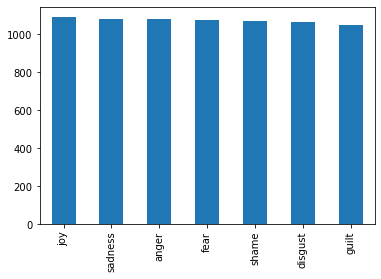

In [8]:
data['Emotion'].value_counts().plot(kind='bar', stacked=False)

In [9]:
data['clean_tweet'].values

array([' joy', ' fear', ' disgust', ..., ' shame', ' disgust', ' shame'],
      dtype=object)

In [10]:
max_words = 2000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['clean_tweet'].values)
X = tokenizer.texts_to_sequences(data['clean_tweet'].values)
X = pad_sequences(X, maxlen=32)

<h3>Test, Train Split</h3>

In [11]:
dummies = pd.get_dummies(data['Emotion'])
Y = dummies.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6012, 32) (6012, 7)
(1503, 32) (1503, 7)


In [12]:
Y[-15:-1]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

In [13]:
dict_emotion = {}
dict_label = {}
for i in range(len(Y)):
    dict_emotion[data['Emotion'][i]] = np.argmax(Y[i])
    dict_label[np.argmax(Y[i])] = data['Emotion'][i]
    if len(dict_emotion) == 13:
        print('Break at: ', i)
        break
        
print(dict_emotion, dict_label)

{'joy': 4, 'fear': 2, 'disgust': 1, 'shame': 6, 'anger': 0, 'sadness': 5, 'guilt': 3} {4: 'joy', 2: 'fear', 1: 'disgust', 6: 'shame', 0: 'anger', 5: 'sadness', 3: 'guilt'}


In [14]:
X_val = X_train[:5000]
Y_val = Y_train[:5000]
partial_X_train = X_train[5000:]
partial_Y_train = Y_train[5000:]

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6012, 32, 1) (6012, 7)
(1503, 32, 1) (1503, 7)


<h2>Hyperparameter Adjustment and Model Initialisation</h2>

In [16]:
enbedding_out_dim = 256
lstm_out_dim = 256

model = Sequential()
model.add(Embedding(max_words, enbedding_out_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out_dim+1))
model.add(Dense(7,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 256)           512000    
                                                                 
 lstm (LSTM)                 (None, 257)               528392    
                                                                 
 dense (Dense)               (None, 7)                 1806      
                                                                 
Total params: 1,042,198
Trainable params: 1,042,198
Non-trainable params: 0
_________________________________________________________________
None


<h2>Fitting the Model and Validation</h2>

In [37]:
print(X_train.shape)
print(Y_train.shape)

batch_size = 64
history = model.fit(X_train,Y_train, epochs = 1, batch_size=batch_size, validation_data=(X_val, Y_val))

(6012, 32, 1)
(6012, 7)
94/94 [==============================] - 14s 137ms/step - loss: 1.2416e-04 - accuracy: 1.0000 - val_loss: 1.1384e-04 - val_accuracy: 1.0000


In [38]:
# # # Save the model
model.save('SentimentAnalyser.h5')

In [39]:
from keras.models import load_model

model = load_model('../SentimentAnalyser.h5')

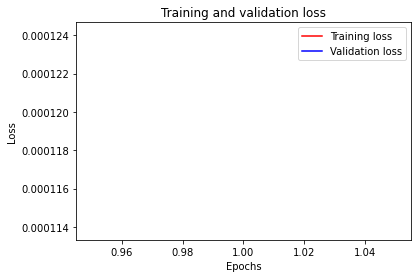

In [40]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
predict = model.predict(X_test)

47/47 [==============================] - 2s 44ms/step


In [42]:
emotion_Y_predicted = np.zeros(predict.shape)

for i in range (0,len(predict)):
    u = predict[i]
    v = np.argmax(u)
    emotion_Y_predicted[i][v] = 1

In [43]:
correct_count = 0
total_count = 0

for j in range(0, predict.shape[0]):
    
    total_count += 1
    
    if np.array_equal(Y_test[j], emotion_Y_predicted[j]) == True:
        
        correct_count += 1

In [44]:
print("Correct Count : ", correct_count)
print("\nTotal Count : ", total_count)

Correct Count :  1503

Total Count :  1503


In [45]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy Score : ", accuracy_score(Y_test, emotion_Y_predicted ))
print("F1 Score : ", f1_score(Y_test, emotion_Y_predicted, average='weighted' ))

Accuracy Score :  1.0
F1 Score :  1.0


In [46]:
def preprocess(input):
    words = word_tokenize(input)
    stop_removed_words = []
    punc_removed_words = []
    lemmed_words = []
  
    for word in words:
        if word not in stop_words:
            stop_removed_words.append(word)

    table1 = str.maketrans('', '', string.punctuation)
    stripped = [v.translate(table1) for v in stop_removed_words]
    punc_removed_words = [word for word in stripped if word.isalpha()]
  
    for pun_word in punc_removed_words:
        lemmed_words.append(lem.lemmatize(pun_word))

    clean_text = ''
    for z in lemmed_words:
        clean_text += ' ' + z

    return clean_text

In [116]:
final_obj = []
final_emotion = 'NILL'
def getInput(ud):
    
    final_obj.clear()
    
    for i in ud:
        final = preprocess(i)
        final_obj.append(final)

    new_tokenizer = Tokenizer(num_words=max_words, split=' ')
    new_tokenizer.fit_on_texts(final_obj)

    X_input = new_tokenizer.texts_to_sequences(final_obj)
    
    X_input = pad_sequences(X_input, maxlen=32)

    emotion_dataset_dummies = pd.get_dummies(data['Emotion'])
    emotion_dataset_Y = emotion_dataset_dummies.values
     
    predict = model.predict(X_input)
    
    print(predict)
  
    np.save("text_emotion.npy", predict)
    
    emotion_Y_predicted = np.zeros(predict.shape)
    
    for i in range (0,len(predict)):
        u = predict[i]
        v = np.argmax(u)
        emotion_Y_predicted[i][v] = 1
    
    final_emotion = dict_label.get(v)
    print(final_emotion)

In [171]:
filename = '../Module I/extracted_text.txt'

with open(filename, 'r') as file:
    file_contents = file.read()

ud = []

ud.append(file_contents)
getInput(ud)

1/1 [==============================] - 0s 37ms/step
[[0.1477422  0.17333654 0.11325449 0.1312013  0.17924011 0.11453625
  0.14068905]]
joy


In [172]:
print("Input  : " , final_obj[0], "\nOutput : ", dict_label.get(np.argmax(emotion_Y_predicted[0])), "\n\n" )

Input  :   robertdowneyjr e RIP Bob D Sr Last night dad passed peacefully sleep year enduring ravage Parkinson s true maverick filmmaker remained remarkably optimistic throughout According stepmoms calculation happily married year Rosemary RogersDowney saint thought prayer 
Output :  joy 




In [173]:
print("Classified Emotion: ", dict_label.get(np.argmax(emotion_Y_predicted[0])));

Classified Emotion:  joy
